In [58]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV



In [59]:
df=pd.read_csv("/content/csv_chronic_kidney_disease_full.csv",error_bad_lines=False)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 71: expected 26 fields, saw 27\nSkipping line 74: expected 26 fields, saw 27\nSkipping line 371: expected 26 fields, saw 27\n'


In [60]:
df

,id,'age','bp','sg','al','su','rbc','pc','pcc','ba',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,1,48,80,1.020,1,0,?,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.020,4,0,?,normal,notpresent,notpresent,...,38,6000,?,no,no,no,good,no,no,ckd
2,3,62,80,1.010,2,3,normal,normal,notpresent,notpresent,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.010,2,0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,396,55,80,1.020,0,0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
393,397,42,70,1.025,0,0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
394,398,12,80,1.020,0,0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
395,399,17,60,1.025,0,0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [61]:
df.shape

(397, 26)

In [62]:
df.isnull().sum()

id         0
'age'      0
'bp'       0
'sg'       0
'al'       0
'su'       0
'rbc'      0
'pc'       0
'pcc'      0
'ba'       0
'bgr'      0
'bu'       0
'sc'       0
'sod'      0
'pot'      0
'hemo'     0
'pcv'      0
'wbcc'     0
'rbcc'     0
'htn'      0
'dm'       0
'cad'      0
'appet'    0
'pe'       0
'ane'      0
'class'    0
dtype: int64

Because the missing values appears in the data with the '?' mark 

```
# This is formatted as code
```



In [63]:
df=df.replace('?',np.nan)

In [64]:
df


,id,'age','bp','sg','al','su','rbc','pc','pcc','ba',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,1,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,3,62,80,1.010,2,3,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.010,2,0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,396,55,80,1.020,0,0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
393,397,42,70,1.025,0,0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
394,398,12,80,1.020,0,0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
395,399,17,60,1.025,0,0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [65]:
df.isna().sum()

id           0
'age'        9
'bp'        12
'sg'        47
'al'        46
'su'        49
'rbc'      150
'pc'        65
'pcc'        4
'ba'         4
'bgr'       43
'bu'        19
'sc'        17
'sod'       85
'pot'       86
'hemo'      52
'pcv'       70
'wbcc'     105
'rbcc'     130
'htn'        2
'dm'         2
'cad'        2
'appet'      1
'pe'         1
'ane'        1
'class'      0
dtype: int64

In [66]:
df["'class'"].value_counts()

ckd       248
notckd    149
Name: 'class', dtype: int64

Lets check null values in form of a graph first

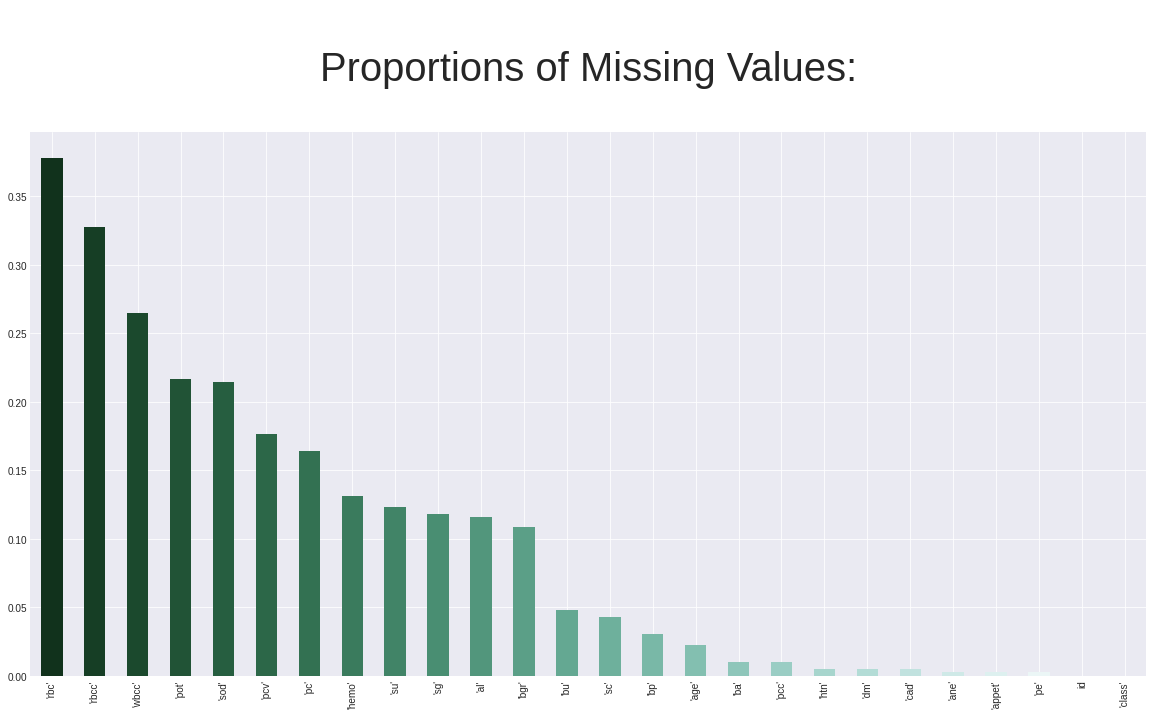

In [67]:
d = ((df.isnull().sum()/df.shape[0])).sort_values(ascending=False)
style.use('seaborn-darkgrid')
d.plot(kind = 'bar',
       color = sns.cubehelix_palette(start=2,
                                    rot=0.15,
                                    dark=0.15,
                                    light=0.95,
                                    reverse=True,
                                    n_colors=24),
        figsize=(20,10))
plt.title("\nProportions of Missing Values:\n",fontsize=40)
plt.show()

# Data imputation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


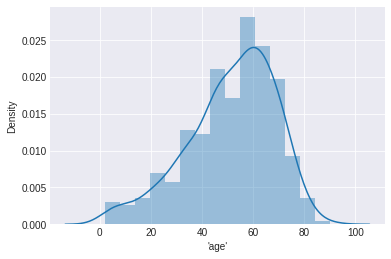

In [68]:
sns.distplot(df["'age'"])

 data seems asymmetrical we will replace age null values with median

In [69]:
df["'age'"] = df["'age'"].replace(np.NaN, df["'age'"].median())

In [70]:
df["'bp'"] = df["'bp'"].replace(np.NaN, df["'bp'"].mode()[0])

In [71]:
  df["'sg'"] = df["'sg'"].replace(np.NaN, df["'sg'"].mode()[0])

In [72]:
df["'al'"] = df["'al'"].replace(np.NaN, df["'al'"].mode()[0])

In [73]:
df["'rbc'"] = df["'rbc'"].replace(np.NaN, df["'rbc'"].mode()[0])

In [74]:
df["'pc'"]= df["'pc'"].replace(np.NaN, df["'pc'"].mode()[0])

In [75]:
df["'pcc'"]= df["'pcc'"].replace(np.NaN, df["'pcc'"].mode()[0])

In [76]:
df["'ba'"] = df["'ba'"].replace(np.NaN, df["'ba'"].mode()[0])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


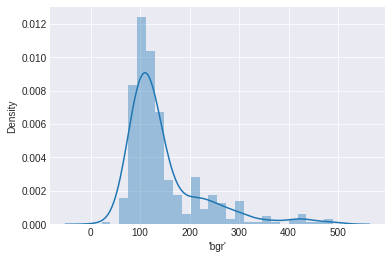

In [77]:
sns.distplot(df["'bgr'"])

In [78]:
df["'bgr'"] = df["'bgr'"].replace(np.NaN, df["'bgr'"].median())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


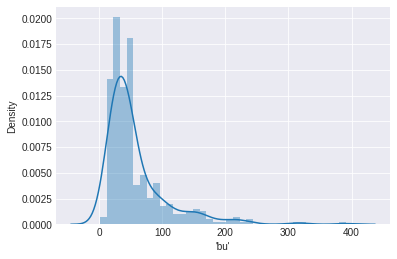

In [79]:
sns.distplot(df["'bu'"])

In [80]:
df["'bu'"] = df["'bu'"].replace(np.NaN, df["'bu'"].median())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


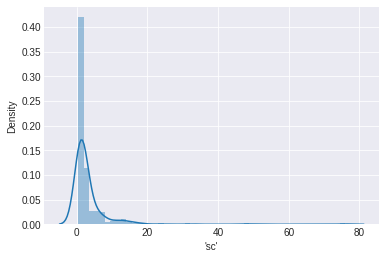

In [81]:
sns.distplot(df["'sc'"])

In [82]:
df["'sc'"] = df["'sc'"].replace(np.NaN, df["'sc'"].median())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


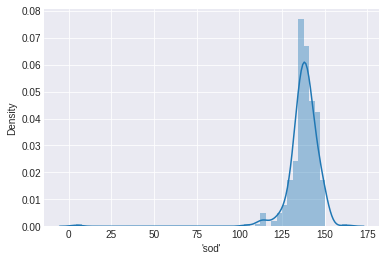

In [83]:
sns.distplot(df["'sod'"])

In [84]:
df["'sod'"] = df["'sod'"].replace(np.NaN, df["'sod'"].median())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


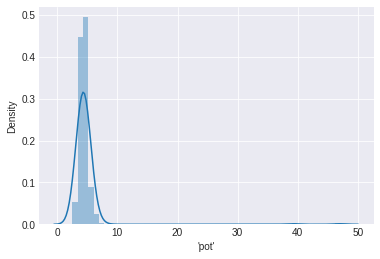

In [85]:
sns.distplot(df["'pot'"])

In [86]:
df["'pot'"] = df["'pot'"].replace(np.NaN, df["'pot'"].median())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


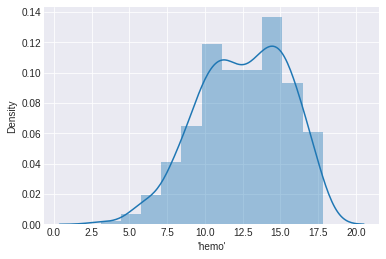

In [87]:
sns.distplot(df["'hemo'"])

In [88]:
df["'hemo'"]= df["'hemo'"].replace(np.NaN, df["'hemo'"].median())


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


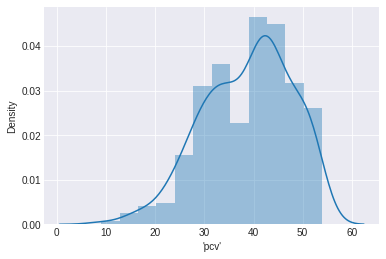

In [89]:
sns.distplot(df["'pcv'"])

In [90]:
df["'pcv'"]= df["'pcv'"].replace(np.NaN,df["'pcv'"].median())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


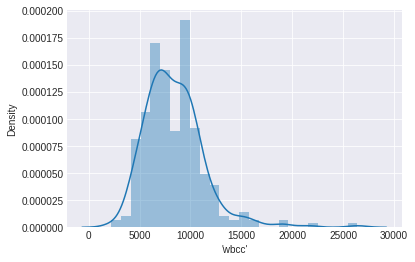

In [91]:
sns.distplot(df["'wbcc'"])

In [92]:
df["'wbcc'"]= df["'wbcc'"].replace(np.NaN, df["'wbcc'"].median())

In [93]:
df["'rbcc'"] = df["'rbcc'"].replace(np.NaN, df["'rbcc'"].median())

In [94]:
df["'htn'"] = df["'htn'"].replace(np.NaN, df["'htn'"].mode()[0])

In [95]:
df["'dm'"] = df["'dm'"].replace(np.NaN, df["'dm'"].mode()[0])

In [96]:
df["'cad'"] = df["'cad'"].replace(np.NaN, df["'cad'"].mode()[0])

In [97]:
df["'appet'"] = df["'appet'"].replace(np.NaN, df["'appet'"].mode()[0])

In [98]:
df["'pe'"] = df["'pe'"].replace(np.NaN, df["'pe'"].mode()[0])

In [99]:
df["'ane'"] = df["'ane'"].replace(np.NaN, df["'ane'"].mode()[0])

In [100]:
df["'class'"] = df["'class'"].replace(np.NaN, df["'class'"].mode()[0])

In [101]:
df["'su'"] = df["'su'"].replace(np.NaN, df["'su'"].mode()[0])

we replace the null value with the mode for categorical attributes and with the median for numerical ones.

verification

In [102]:
df.isnull().sum()

id         0
'age'      0
'bp'       0
'sg'       0
'al'       0
'su'       0
'rbc'      0
'pc'       0
'pcc'      0
'ba'       0
'bgr'      0
'bu'       0
'sc'       0
'sod'      0
'pot'      0
'hemo'     0
'pcv'      0
'wbcc'     0
'rbcc'     0
'htn'      0
'dm'       0
'cad'      0
'appet'    0
'pe'       0
'ane'      0
'class'    0
dtype: int64

In [103]:
df.dtypes

id          int64
'age'      object
'bp'       object
'sg'       object
'al'       object
'su'       object
'rbc'      object
'pc'       object
'pcc'      object
'ba'       object
'bgr'      object
'bu'       object
'sc'       object
'sod'      object
'pot'      object
'hemo'     object
'pcv'      object
'wbcc'     object
'rbcc'     object
'htn'      object
'dm'       object
'cad'      object
'appet'    object
'pe'       object
'ane'      object
'class'    object
dtype: object

all attributes are of type object so we need to change it to the their appropriate types

pcv, wc, and rc column should have dtype of float as it contains all integer

In [104]:
df[["'rbcc'","'bp'","'sg'","'al'","'bgr'","'bu'","'sc'","'sod'","'pot'","'su'","'hemo'"]] = df[["'rbcc'","'bp'","'sg'","'al'","'bgr'","'bu'","'sc'","'sod'","'pot'","'su'","'hemo'"]].astype('float64')
df[["'pcv'", "'wbcc'", "'age'"]] = df[["'pcv'", "'wbcc'", "'age'"]].astype('int64')
df.dtypes

id           int64
'age'        int64
'bp'       float64
'sg'       float64
'al'       float64
'su'       float64
'rbc'       object
'pc'        object
'pcc'       object
'ba'        object
'bgr'      float64
'bu'       float64
'sc'       float64
'sod'      float64
'pot'      float64
'hemo'     float64
'pcv'        int64
'wbcc'       int64
'rbcc'     float64
'htn'       object
'dm'        object
'cad'       object
'appet'     object
'pe'        object
'ane'       object
'class'     object
dtype: object

Dropping unnecessary columns

In [105]:
df.drop('id',axis=1,inplace=True)
df.head()

,'age','bp','sg','al','su','rbc','pc','pcc','ba','bgr',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,48,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,38,6000,4.8,no,no,no,good,no,no,ckd
2,62,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,4.8,no,yes,no,poor,no,yes,ckd
3,48,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


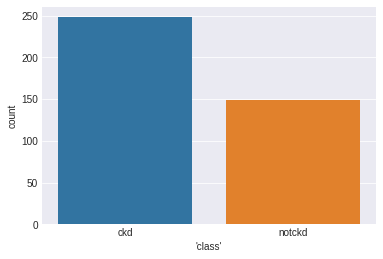

In [106]:

sns.countplot(x = "'class'", data = df)

==> unbalanced data 

Label Encoding

In [107]:
col = ["'pcc'","'rbc'", "'pc'", "'ba'", "'htn'", "'dm'", "'cad'", "'pe'", "'ane'"]
encoder = LabelEncoder()
for col in col:
    df[col] = encoder.fit_transform(df[col])

In [108]:
df[["'appet'", "'class'"]] = df[["'appet'", "'class'"]].replace(to_replace={'good':'1', 'ckd':'1', 'notckd':'0', 'poor':'0'})


In [109]:
df.head(4)

,'age','bp','sg','al','su','rbc','pc','pcc','ba','bgr',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,48,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44,7800,5.2,1,1,0,1,0,0,1
1,7,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38,6000,4.8,0,0,0,1,0,0,1
2,62,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31,7500,4.8,0,1,0,0,0,1,1
3,48,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32,6700,3.9,1,0,0,0,1,1,1


In [110]:
df.dtypes

'age'        int64
'bp'       float64
'sg'       float64
'al'       float64
'su'       float64
'rbc'        int64
'pc'         int64
'pcc'        int64
'ba'         int64
'bgr'      float64
'bu'       float64
'sc'       float64
'sod'      float64
'pot'      float64
'hemo'     float64
'pcv'        int64
'wbcc'       int64
'rbcc'     float64
'htn'        int64
'dm'         int64
'cad'        int64
'appet'     object
'pe'         int64
'ane'        int64
'class'     object
dtype: object

In [111]:
df[["'class'", "'appet'"]] = df[["'class'", "'appet'"]].astype('int64')

In [112]:
df.shape

(397, 25)

# Feature Selection 

**Correlation Matrix**

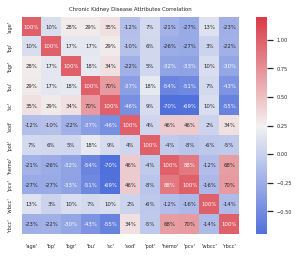

In [113]:
sns.set(font_scale=0.45)
plt.title('Chronic Kidney Disease Attributes Correlation')
cmap = sns.diverging_palette(260, 10, as_cmap=True)
sns.heatmap(df[["'age'","'bp'","'bgr'","'bu'","'sc'","'sod'","'pot'","'hemo'","'pcv'","'wbcc'","'rbcc'"]].corr("spearman"), vmax=1.2, annot=True, square='square', cmap=cmap, fmt = '.0%')

From Heatmap and Scatterplot, we can easily observe that PCV and Hemoglobin is

highly correlated with 88%. So we can remove anyone of this column as it is acting like duplicate of another.
From Heatmap and Scatterplot, we can observe that RBC count and PCV are 76% correlated
Also RBC count and hemoglobin are 75% correlated while Blood Urea and Serum Creatinine are 69% correlated.

In [114]:
df.drop("'hemo'",axis=1,inplace=True)
df.drop("'rbc'",axis=1,inplace=True)
df.drop("'sc'",axis=1,inplace=True)


In [115]:
X = df.drop("'class'", axis=1)
y = df["'class'"]

In [116]:
X.shape

(397, 21)

**RFECV**

Optimal number of features : 14


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


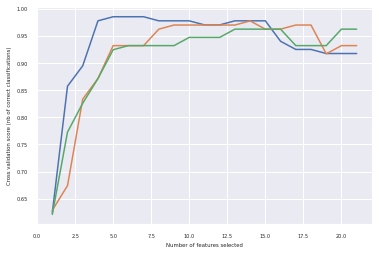

[4 1 1 1 1 1 6 7 3 2 1 1 1 5 1 1 1 8 1 1 1]


In [117]:

svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, cv=3)
rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)
# Plotting number of features and cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()
print(rfecv.ranking_)

Optimal number of features is 17 as shown

# Standardization of the data

In [118]:
scaler = StandardScaler()
features = scaler.fit_transform(X)
features

array([[-0.20766227,  0.2537764 ,  0.41742111, ...,  0.51021315,
        -0.48261709, -0.42194969],
       [-2.63068651, -1.96863308,  0.41742111, ...,  0.51021315,
        -0.48261709, -0.42194969],
       [ 0.61971186,  0.2537764 , -1.4238698 , ..., -1.95996516,
        -0.48261709,  2.36995077],
       ...,
       [-2.33519575,  0.2537764 ,  0.41742111, ...,  0.51021315,
        -0.48261709, -0.42194969],
       [-2.03970499, -1.22782992,  1.33806657, ...,  0.51021315,
        -0.48261709, -0.42194969],
       [ 0.38331925,  0.2537764 ,  1.33806657, ...,  0.51021315,
        -0.48261709, -0.42194969]])

# Splitting data 

In [119]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2) 